In [1]:
#importing libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
from timeit import default_timer as timer

## Gathering Data


In [130]:
#loading the twitter-archive-enhanced.csv
twitter_archive = pd.read_csv('./data/twitter-archive-enhanced.csv')

In [3]:
# creaing a request to extract Image-predictions.tsv file and storing it in data floder
try:
    r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

    with open('./data/image-predictions.tsv', mode='wb') as file:
        file.write(r.content)
except:
    print("error")

In [174]:
#loading image prediction tsv file and seprating it with "/t" as it is tab seprated values
image_pred = pd.read_csv('./data/image-predictions.tsv', sep='\t')

In [5]:
try:
    consumer_key = 'zGtdXa19dWZ2Y3ZzAAJK5l7AW'
    consumer_secret = '3N2ZrxXA0EaUaa8mNX5CBCDwKaLdkQIzE6ayre3DPKSi7F527b'
    access_token = '988335209795018752-DQ7zZj6Pk4Y3dBo1eeGSAOsU5TtvWZR'
    access_secret = 'Wjj5m1RG5dDzEgvvxkKkjTEnGS89En6UB19o3qSQ8wCkH'

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)
except:
    print("error")

In [70]:
try:
    tweet_ids = twitter_archive.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('./data/tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)
except:
    prin("error")

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [175]:
try:
    #creating a list
    tweets_data = []
    
    #opening the Tweet_Json file 
    tweet_file = open('./data/tweet_json.txt', "r")
    
    
    # For loop to append each tweet into a list
    for line in tweet_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

    tweet_file.close()
except:
    print("error")

In [176]:
try:
    # Create tweet_info DataFrame
    tweet_info = pd.DataFrame()
    #adding the required column in the dataframe
    tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
    tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
    tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
except:
    print("error")

## Assessing Data


### Access twitter_archive

In [177]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [178]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Observations:
   >1. Missing data in the following columns:
                a. in_reply_to_status_id
                b. in_reply_to_user_id
                c. retweeted_status_id
                d.retweeted_status_user_id
                e. retweeted_status_timestamp
                f. expanded_urls
2. Timestamp and retweeted_status_timestamp is an object
3. Source columns have HTML tags
4. This dataset includes retweets, which means there is duplicated data


In [179]:
# checks for duplicated entries for tweet id in twitter_archive
twitter_archive.tweet_id.duplicated().sum()

0

## Observations:
   > 1. No duplicate entries found

In [180]:
twitter_archive[twitter_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
actually         2
getting          2
not              2
mad              2
space            1
unacceptable     1
such             1
his              1
this             1
infuriating      1
life             1
light            1
incredibly       1
my               1
old              1
all              1
officially       1
by               1
Name: name, dtype: int64

In [181]:
twitter_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


### Access image_pred_df

In [182]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True



**dog breeds are not consistently in p1,p2,p3 columns i.e lower or uppercase**

In [183]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Observations:
   >1.  No Null values found.
2.  All datatypes are correct.

In [184]:
# checks for duplicated entries in image_pred_df
image_pred.tweet_id.duplicated().sum()

0

## Observations:
   > 1. No duplicate entries found.

In [185]:
# checks for duplicated entries in jpg_url
image_pred.jpg_url.duplicated().sum()

66

## Observations:
   >1. There are total 66 duplicate entries found in the "image_prediction.tsv" file

In [186]:
image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Access tweet_counts

In [187]:
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,7692,36120
1,892177421306343426,5689,31152
2,891815181378084864,3774,23463
3,891689557279858688,7850,39388
4,891327558926688256,8465,37608


In [188]:
tweet_info.sample(20)

,id,retweet_count,favorite_count
2013,671550332464455680,201,872
1604,684588130326986752,1403,4094
907,754449512966619136,735,3760
1309,705442520700944385,1616,4395
1251,709179584944730112,664,1981
181,855860136149123072,937,4761
1147,720415127506415616,1486,4082
1784,676864501615042560,695,2057
787,771908950375665664,1928,6639
393,823333489516937216,25,705


In [189]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


## Observations:
   > 1. No null values found
2. All datatypes are correct

In [190]:
tweet_info.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2698.912913,7539.628057
std,6.823170e+16,4562.889181,11702.370027
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,546.000000,1314.500000
50%,7.182469e+17,1266.000000,3278.000000
75%,7.986692e+17,3137.000000,9234.500000
max,8.924206e+17,77635.000000,155726.000000


In [191]:
# checks for duplicated entries in tweet_counts_df
tweet_info.id.duplicated().sum()

0

## Observations:
> 1. No Duplicate entries present

## Observations:
### Quality Issues
   > **twitter_archive:**
       > 1. Missing data in the following columns:
                    a. in_reply_to_status_id
                    b. in_reply_to_user_id
                    c. retweeted_status_id
                    d.retweeted_status_user_id
                    e. retweeted_status_timestamp
                    f. expanded_urls
    2. Timestamp and retweeted_status_timestamp is an object
    3. Source columns have HTML tags
    4. This dataset includes retweets, which means there is duplicated data
    5. Some of the rows have invalid strings in the name column, e.g. "a", "an", "in".
>
> ##### **image_pred**:
      1.dog breeds are not consistently in p1,p2,p3 columns
>
> ##### **tweet_info:**
      1. tweet_id is an object

### Tidiness Issues
   > 1. Image_predictions and twwet_json files both has to be joined with Twitter_archive file.
2. Dog "stage" variable in four columns: doggo, floofer, pupper, puppo

## Cleaning Data


**DEFINE-CODE-TEST**

1. converting Timestamp into datetime and retweeted_status_timestamp is an object

1. Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements
2. Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer'
3. Convert the id in tweet_info into int64 type for merging.
4. Merge the copied archive, image_pred, and tweet_info dataframes
5. Convert the tweet_id in master_df into object type
6. Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column
7. Remove Inconsistency in pred_breed
8. Delete retweets
9. Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
10. Change the timestamp to correct datetime format
11. Removing HTML tags from source column
12. Standardize dog ratings


**CODE**

In [192]:
image_pred.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1466,778650543019483137,https://pbs.twimg.com/media/Cs5ShihWEAAH2ti.jpg,1,German_shepherd,0.515699,True,malinois,0.300292,True,kelpie,0.087022,True
901,700002074055016451,https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg,1,Chihuahua,0.369488,True,schipperke,0.243367,True,pug,0.161614,True
1769,827324948884643840,https://pbs.twimg.com/media/C3s_pYrXAAA1eqZ.jpg,1,golden_retriever,0.352486,True,toy_poodle,0.178884,True,Labrador_retriever,0.084164,True
405,673707060090052608,https://pbs.twimg.com/media/CVl8_EPWoAAcuSC.jpg,1,German_short-haired_pointer,0.935771,True,kelpie,0.022561,True,Labrador_retriever,0.008847,True


In [193]:
try:
    image_pred['pred_breed'] = [df['p1'] if df['p1_dog'] == True and df['p1_conf'] > 0.3
                     else df['p2'] if df['p2_dog'] == True and df['p2_conf'] > 0.3
                     else df['p3'] if df['p3_dog'] == True and df['p3_conf'] > 0.3
                     else np.nan for index, df in image_pred.iterrows()]
except:
    print("error")

In [194]:
try:
    ## Drop 'p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf' columns
    image_pred.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf'], axis = 1, inplace=True)
except:
    print("error")

In [195]:
image_pred.head(5)

,tweet_id,jpg_url,img_num,pred_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


**DEFINE**


**2. Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer'**

**CODE**

In [120]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [121]:
try:
    twitter_archive.doggo.replace(np.NaN, '', inplace=True)
    twitter_archive.floofer.replace(np.NaN, '', inplace=True)
    twitter_archive.pupper.replace(np.NaN, '', inplace=True)
    twitter_archive.puppo.replace(np.NaN, '', inplace=True)
    twitter_archive.doggo.replace('None', '', inplace=True)
    twitter_archive.floofer.replace('None', '', inplace=True)
    twitter_archive.pupper.replace('None', '', inplace=True)
    twitter_archive.puppo.replace('None', '', inplace=True)
except:
    print("error")

In [122]:
try:
    twitter_archive['stage'] = twitter_archive.doggo + twitter_archive.floofer + twitter_archive.pupper + twitter_archive.puppo
    twitter_archive.loc[twitter_archive.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
    twitter_archive.loc[twitter_archive.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
    twitter_archive.loc[twitter_archive.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
except:
    print("error")

In [127]:
# Convert the stage in archive_clean into categorical dtype
twitter_archive['stage'] = twitter_archive['stage'].astype('category')

In [129]:
# drop 'doggo', 'floofer', 'pupper', 'puppo' columns
twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=0, inplace=True)
twitter_archive.stage.replace('', np.nan, inplace=True)

ValueError: labels ['doggo' 'floofer' 'pupper' 'puppo'] not contained in axis

**TEST**

In [208]:
archive_clean.stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
                    0
Name: stage, dtype: int64

**DEFINE**


**3. Convert the tweet_id in tweet_counts_clean into int64 type for merging**

**CODE**

In [209]:
tweet_counts_clean['tweet_id'] = tweet_counts_clean['tweet_id'].astype('int64')

**TEST**

In [210]:
tweet_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


**DEFINE**


**4. Merge the copied archive_clean, image_pred_clean, and tweet_counts_clean dataframes**

**CODE**

In [211]:
from functools import reduce
df = [archive_clean, image_pred_clean, tweet_counts_clean]
master_df = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), df)

**TEST**

In [212]:
master_df.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,pred_breed,favorite_count,retweet_count
1821,670433248821026816,NaN,NaN,2015-11-28 02:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sam. He's trying to escape the inordin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670433248...,10,10,Sam,NaN,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,1,NaN,319,106


**DEFINE**


**5. Convert the tweet_id in master_df into object type**

**CODE**

In [213]:
master_df['tweet_id'] = master_df['tweet_id'].astype('object')

**TEST**

In [214]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 19 columns):
tweet_id                      2059 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
stage                         318 non-null category
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
pred_breed                    1460 non-null object
favorite_count                2059

**DEFINE**


**6. Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column**


**CODE**

In [215]:
words = master_df[master_df.name.str.islower()].name.unique()

In [216]:
master_df['name'] = master_df['name'].replace(words, np.nan)
master_df['name'] = master_df['name'].replace('None', np.nan)


In [217]:
master_df['name'].dropna()

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Gerald
20         Jeffrey
22          Canela
25            Maya
26          Mingus
27           Derek
28          Roscoe
29         Waffles
30           Jimbo
31          Maisey
32           Lilly
34            Earl
35            Lola
36           Kevin
           ...    
1972          Dook
1974          Hall
1975      Philippe
1978         Reese
1979       Cupcake
1983         Biden
1984          Fwed
1986     Genevieve
1987        Joshwa
1990       Timison
1993      Clarence
1994       Kenneth
1995       Churlie
1996       Bradlay
1997         Pipsy
1999          Gabe
2000         Clybe
2001          Dave
2003          Keet
2005        Klevin
2006         Carll
2011        

**TEST**

In [220]:
master_df.name.value_counts()

Charlie      10
Tucker       10
Cooper       10
Penny        10
Oliver       10
Lucy          9
Sadie         8
Winston       8
Bo            8
Lola          8
Toby          7
Daisy         7
Koda          6
Dave          6
Milo          6
Bella         6
Bailey        6
Rusty         6
Jax           6
Stanley       6
Scout         6
Alfie         5
Leo           5
Oscar         5
Louis         5
Larry         5
Chester       5
Buddy         5
Gary          4
Finn          4
             ..
Batdog        1
Rey           1
Bookstore     1
Josep         1
Willem        1
Maisey        1
Huck          1
Marlee        1
Jonah         1
Ozzie         1
Howie         1
Bobble        1
Adele         1
Roscoe        1
Lambeau       1
Margo         1
Luna          1
Maks          1
Karma         1
Tango         1
Dotsy         1
Darby         1
Deacon        1
Edmund        1
Logan         1
Leonidas      1
Griswold      1
Brandy        1
Livvie        1
Diogi         1
Name: name, Length: 911,

**DEFINE**


**7. Remove Inconsistency in pred_bread**

**CODE**

In [221]:
master_df['pred_breed'] = master_df['pred_breed'].astype('str')
master_df['pred_breed'] = master_df['pred_breed'].str.lower().str.replace('_', ' ').str.replace('-', ' ')
master_df['pred_breed'] = master_df['pred_breed'].replace('nan', np.nan)

**TEST**

In [222]:
master_df['pred_breed'].value_counts()[:5]

golden retriever      152
labrador retriever     96
pembroke               89
chihuahua              77
pug                    56
Name: pred_breed, dtype: int64

**DEFINE**


**8. Delete Retweets**

**CODE**

In [223]:
# Delete the rows which contains retweets
master_df = master_df.drop(master_df[(master_df['in_reply_to_status_id'].isnull() == False) | (master_df['retweeted_status_id'].isnull() == False)].index)

**TEST**

In [224]:
master_df.shape

(1964, 19)

**DEFINE**


**9. Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp**

**CODE**

In [225]:
# drop the reply status and retweet status columns
master_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

**TEST**

In [226]:
master_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'jpg_url',
       'img_num', 'pred_breed', 'favorite_count', 'retweet_count'],
      dtype='object')

In [227]:
assert master_df['expanded_urls'].isnull().any() == False

No missing values in expanded_urls now after removing 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp' columns

In [228]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 14 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1342 non-null object
stage                 302 non-null category
jpg_url               1964 non-null object
img_num               1964 non-null int64
pred_breed            1395 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
dtypes: category(1), int64(5), object(8)
memory usage: 217.1+ KB


**DEFINE**


**10. Change the timestamp to correct datetime format**

**CODE**

In [229]:
master_df.sample(1)['timestamp']

1593    2015-12-10 17:37:00 +0000
Name: timestamp, dtype: object

In [230]:
master_df['timestamp'] = pd.to_datetime(master_df['timestamp'], format='%Y-%m-%d %H:%M:%S')

**TEST**

In [231]:
master_df.sample(3)['timestamp']

1878   2015-11-25 01:30:16
1280   2016-01-20 20:21:00
1107   2016-03-02 16:23:36
Name: timestamp, dtype: datetime64[ns]

In [232]:
master_df['timestamp'].describe()

count                    1964
unique                   1964
top       2016-08-04 22:52:29
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

**DEFINE**


**11. Removing HTML tags from source column**


**CODE**

In [233]:
href = master_df["source"].str.split('"', expand = True)
master_df["source"] = href[1]

**TEST**

In [234]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,pred_breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,36324,7728
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,31306,5721
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,23585,3786
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,39633,7892
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,37834,8512


In [235]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 14 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1342 non-null object
stage                 302 non-null category
jpg_url               1964 non-null object
img_num               1964 non-null int64
pred_breed            1395 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
dtypes: category(1), datetime64[ns](1), int64(5), object(7)
memory usage: 217.1+ KB


**DEFINE**


**12. Standardize dog ratings**


**CODE**

In [236]:
ratings = master_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [237]:
master_df.rating_numerator = ratings
master_df['rating_numerator'] = master_df['rating_numerator'].astype('float64')

In [238]:
# standardizing to a denominator of 10 for groups of dogs:

rating_num = [int(round(num/(denom/10)))  if denom != 10 and num/denom <= 2 
                           else num for num, denom in zip(master_df['rating_numerator'], master_df['rating_denominator'])]
rating_denom = [10 if denom != 10 and num/denom <= 2
                             else denom for num, denom in zip(master_df['rating_numerator'], master_df['rating_denominator'])]
master_df['rating_numerator'] = rating_num
master_df['rating_denominator'] = rating_denom

master_df = master_df.drop(master_df[((master_df['rating_denominator'] != 10) | (master_df['rating_numerator'] > 20))].index)

**TEST**

In [239]:
master_df[['rating_numerator', 'rating_denominator']].skew()

rating_numerator     -1.456834
rating_denominator    0.000000
dtype: float64

In [240]:
master_df['rating_numerator'].unique()

array([ 13.  ,  12.  ,  14.  ,  13.5 ,  11.  ,   6.  ,  10.  ,   0.  ,
         9.75,   5.  ,  11.27,   3.  ,   7.  ,   8.  ,   9.  ,   4.  ,
         2.  ,  11.26,   1.  ])

In [241]:
master_df['rating_denominator'].unique()

array([10])

In [242]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2058
Data columns (total 14 columns):
tweet_id              1961 non-null object
timestamp             1961 non-null datetime64[ns]
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null int64
name                  1340 non-null object
stage                 302 non-null category
jpg_url               1961 non-null object
img_num               1961 non-null int64
pred_breed            1394 non-null object
favorite_count        1961 non-null int64
retweet_count         1961 non-null int64
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 216.8+ KB


## Storing, Analyzing, and Visualizing Data

In [243]:
# storing master dataframe as csv
master_df.to_csv('clean_Twitter_archive.csv', encoding='utf-8', index=False)

In [244]:
# read master_archive.csv
df = pd.read_csv('clean_Twitter_archive.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 14 columns):
tweet_id              1961 non-null int64
timestamp             1961 non-null object
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null int64
name                  1340 non-null object
stage                 302 non-null object
jpg_url               1961 non-null object
img_num               1961 non-null int64
pred_breed            1394 non-null object
favorite_count        1961 non-null int64
retweet_count         1961 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 214.6+ KB


In [245]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,favorite_count,retweet_count
count,1.961000e+03,1961.000000,1961.0,1961.000000,1961.000000,1961.000000
mean,7.358030e+17,10.528700,10.0,1.202448,8348.349312,2478.276390
std,6.745542e+16,2.179024,0.0,0.559987,12278.989301,4433.814335
min,6.660209e+17,0.000000,10.0,1.000000,72.000000,11.000000
25%,6.758457e+17,10.000000,10.0,1.000000,1785.000000,554.000000
50%,7.087111e+17,11.000000,10.0,1.000000,3769.000000,1198.000000
75%,7.877176e+17,12.000000,10.0,1.000000,10372.000000,2833.000000
max,8.924206e+17,14.000000,10.0,4.000000,156794.000000,78127.000000



### Which rating was given to most of the dogs?

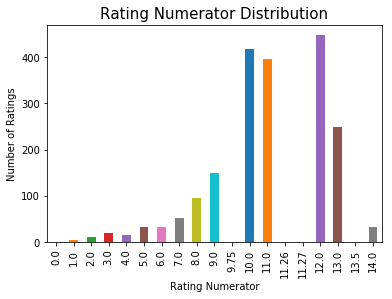

In [246]:
df['rating_numerator'].value_counts().sort_index().plot('bar')
plt.title ('Rating Numerator Distribution', size=15)
plt.xlabel('Rating Numerator')
plt.ylabel('Number of Ratings')
plt.plot();

Most of the dogs get rating_numerator in between 10-13

There is very few dogs even 1 or 2 with rating 0 and numerator rating as float


### What are the 10 most frequent dog names?


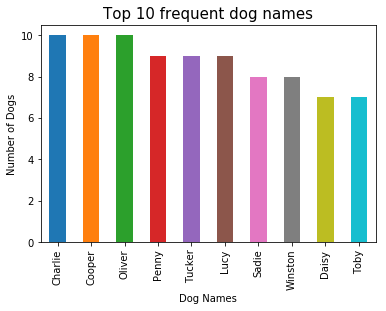

In [247]:
df['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.plot();

Most of the dogs are of names: Charlie, Cooper, liver, Penny, Tucker, Lucy, Sadie, Winston, Daisy, Toby

Also, check the count below:

In [248]:
#Top 10 frequent dog names
df['name'].value_counts()[0:10].sort_values(ascending=False)

Charlie    10
Cooper     10
Oliver     10
Penny       9
Tucker      9
Lucy        9
Sadie       8
Winston     8
Daisy       7
Toby        7
Name: name, dtype: int64


### What are the 10 most frequent predicted dog breeds?


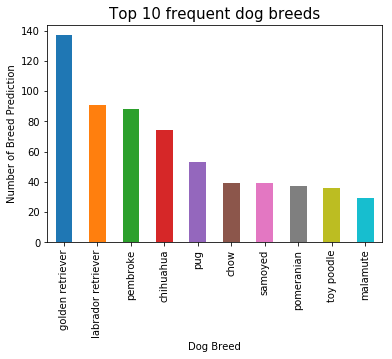

In [253]:
df['pred_breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Breed Prediction')
plt.title('Top 10 frequent dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.plot();

Most of the dogs have golden retriever, labrador retriever as breed which all are rated

Please check the top 10 rated dog breeds below:

In [254]:
#Top 10 frequent dog breeds
df['pred_breed'].value_counts()[0:10].sort_values(ascending=False)

golden retriever      137
labrador retriever     91
pembroke               88
chihuahua              74
pug                    53
chow                   39
samoyed                39
pomeranian             37
toy poodle             36
malamute               29
Name: pred_breed, dtype: int64

## Findings of the analysis

1. The pred_breed column is created based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements
2. Based on dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer', only one categorical column is created named as 'stage'
3. tweet_id is set as object type as it is not going to use for calculation.
4. A Master dataframe is created using archive_clean, image_pred_clean, and tweet_counts_clean dataframes
5. Dog Names Issue got rectified
7. Inconsistency in pred_breed got removed
8. All retweets get deleted to get unique tweets
9. The columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp is removed which is not needed
10. Timestamp format got corrected to datetime format
11. Extra HTML tags from source column get refracted
12. Dog ratings get standardized for denom of 10.

In [261]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0